In [1]:
# importing essential libraries and packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading the dataset
df = pd.read_csv("C:\\Users\\hp\\Desktop\\MS_Dhoni_ODI_record.csv")
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,12/23/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,12/26/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,12/27/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,4/2/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,4/5/2005,ODI # 2236


In [3]:
# removing the first 2 characters in the opposition string
df['opposition'] = df['opposition'].apply(lambda x: x[2:])
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,12/23/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,12/26/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,12/27/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,4/2/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,4/5/2005,ODI # 2236


In [4]:
# creating a feature for match year

df['year'] = pd.DatetimeIndex(df['date']).year.astype(int)

In [5]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,12/23/2004,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,12/26/2004,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,12/27/2004,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,4/2/2005,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,4/5/2005,ODI # 2236,2005


In [6]:
# creating a feature for being not out
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,12/23/2004,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,12/26/2004,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,12/27/2004,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,4/2/2005,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,4/5/2005,ODI # 2236,2005,0


In [7]:
# dropping ODI number columns
df.drop(columns='odi_number', inplace=True)

In [8]:
df.shape

(350, 11)

In [9]:
# dropping those innings where Mahi did not bat
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]
df_new.head(50)

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,12/23/2004,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,12/26/2004,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,12/27/2004,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,4/2/2005,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,4/5/2005,2005,0
5,28,24,116.66,5,0,Pakistan,Jamshedpur,4/9/2005,2005,0
6,47,64,73.43,4,1,Pakistan,Ahmedabad,4/12/2005,2005,0
7,11,16,68.75,1,0,Pakistan,Kanpur,4/15/2005,2005,0
8,24,38,63.15,2,0,Pakistan,Delhi,4/17/2005,2005,0
9,2,7,28.57,0,0,Sri Lanka,Dambulla,7/30/2005,2005,0


In [10]:
df_new.shape

(297, 10)

In [11]:
# fixing the data types of numerical columns
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [12]:
df['date'] = df['date'].apply(lambda v: datetime.datetime.strptime(v, '%m/%d/%Y'))
print('First Match: ',df['date'].min())
print('Last Match: ',df['date'].max())
number_of_matches = df.shape[0]
print('Number of matches played:', number_of_matches)
number_of_inns = df_new.shape[0]
print('Number of innings played:', number_of_inns)
not_outs = df_new['not_out'].sum()
print('Not outs:', not_outs)
runs_scored = df_new['runs_scored'].sum()
print('Runs scored in career:', runs_scored)
balls_faced = df_new['balls_faced'].sum()
print('Balls faced in career:', balls_faced)
career_sr = (runs_scored / balls_faced)*100
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg = (runs_scored / (number_of_inns - not_outs))
print('Career average: {:.2f}'.format(career_avg))
highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(), 'date'].values[0]
highest_score = df.loc[df.date == highest_score_date, 'score'].values[0]
print('Highest score in career:', highest_score)
hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0]
print('Number of 100s:', hundreds)
fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0]
print('Number of 50s:', fifties)
fours = df_new['fours'].sum()
print('Number of 4s:', fours)
sixes = df_new['sixes'].sum()
print('Number of 6s:', sixes)

First Match:  2004-12-23 00:00:00
Last Match:  2019-07-09 00:00:00
Number of matches played: 350
Number of innings played: 297
Not outs: 84
Runs scored in career: 10773
Balls faced in career: 12303
Career strike rate: 87.56
Career average: 50.58
Highest score in career: 183*
Number of 100s: 10
Number of 50s: 73
Number of 4s: 826
Number of 6s: 229


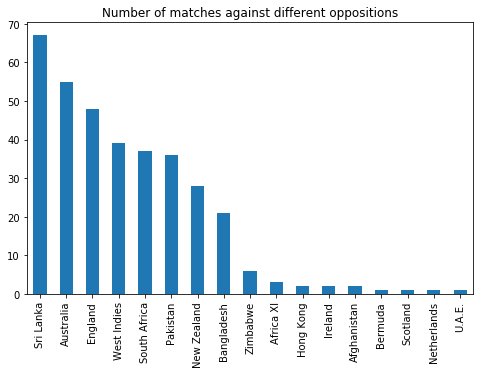

In [13]:
# number of matches played against different oppositions
df['opposition'].value_counts().plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5));

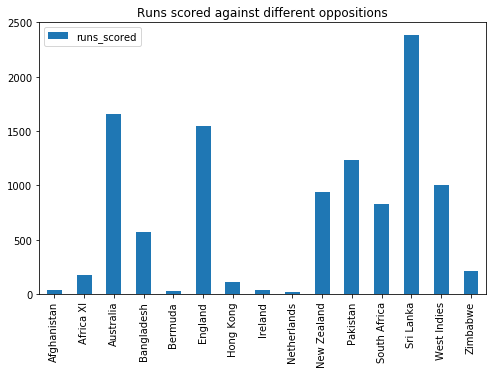

In [14]:
runs_scored_by_opposition = pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
runs_scored_by_opposition.plot(kind='bar', title='Runs scored against different oppositions', figsize=(8, 5))
plt.xlabel(None);

In [15]:
innings_by_opposition = pd.DataFrame(df_new.groupby('opposition')['date'].count())
not_outs_by_opposition = pd.DataFrame(df_new.groupby('opposition')['not_out'].sum())
temp = runs_scored_by_opposition.merge(innings_by_opposition, left_index=True, right_index=True)
average_by_opposition = temp.merge(not_outs_by_opposition, left_index=True, right_index=True)
average_by_opposition.rename(columns = {'date': 'innings'}, inplace=True)
average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings'] - average_by_opposition['not_out']
average_by_opposition['average'] = average_by_opposition['runs_scored'] / average_by_opposition['eff_num_of_inns']
average_by_opposition.replace(np.inf, np.nan, inplace=True)
major_nations = ['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']

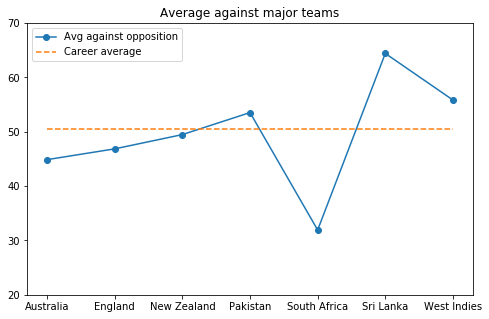

In [16]:
plt.figure(figsize = (8, 5))
plt.plot(average_by_opposition.loc[major_nations, 'average'].values, marker='o')
plt.plot([career_avg]*len(major_nations), '--')
plt.title('Average against major teams')
plt.xticks(range(0, 7), major_nations)
plt.ylim(20, 70)
plt.legend(['Avg against opposition', 'Career average']);

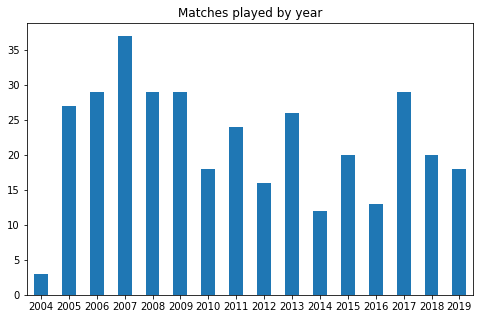

In [17]:
df['year'].value_counts().sort_index().plot(kind='bar', title='Matches played by year', figsize=(8, 5))
plt.xticks(rotation=0);

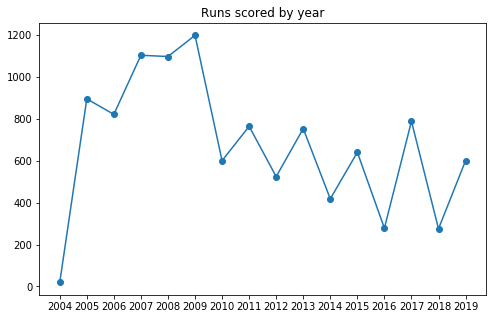

In [18]:
df_new.groupby('year')['runs_scored'].sum().plot(kind='line', marker='o', title='Runs scored by year', figsize=(8, 5))
years = df['year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None);

In [19]:
df_new.reset_index(drop=True, inplace=True)
career_average = pd.DataFrame()
career_average['runs_scored_in_career'] = df_new['runs_scored'].cumsum()
career_average['innings'] = df_new.index.tolist()
career_average['innings'] = career_average['innings'].apply(lambda x: x+1)
career_average['not_outs_in_career'] = df_new['not_out'].cumsum()
career_average['eff_num_of_inns'] = career_average['innings'] - career_average['not_outs_in_career']
career_average['average'] = career_average['runs_scored_in_career'] / career_average['eff_num_of_inns']

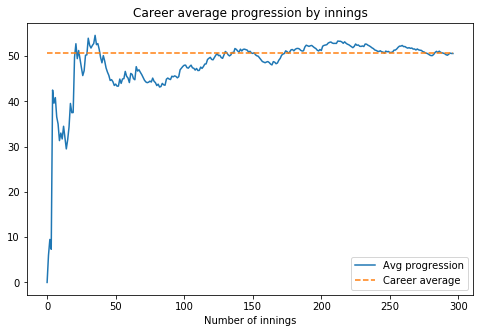

In [20]:
plt.figure(figsize = (8, 5))
plt.plot(career_average['average'])
plt.plot([career_avg]*career_average.shape[0], '--')
plt.title('Career average progression by innings')
plt.xlabel('Number of innings')
plt.legend(['Avg progression', 'Career average']);